In [2]:
# Step 1: Load dataset, split into training and test sets, scale features and add intercept terms
import numpy as np
from sklearn.datasets import load_boston
from matplotlib.legend_handler import HandlerTuple

# load boston housing price dataset
boston = load_boston()
x = boston.data
y = boston.target

# split into training and test sets, namely 80 percent of examples goes for the training, 20 percent goes for the test set
N_train = int(0.8 * x.shape[0])
x_train = x[:N_train,:]
y_train = y[:N_train]
x_test = x[N_train:,:]
y_test = y[N_train:]

# scale features by removing mean and dividing by the standard deviation
x_bar = np.mean(x_train,axis=0)
x_std = np.std(x_train,axis=0)
x_train_scaled = (x_train - x_bar)/x_std
x_test_scaled = (x_test - x_bar)/x_std

print('Number of training samples: ',x_train_scaled.shape[0])
print('Number of testing samples: ',x_test_scaled.shape[0])

# add intercept term
intercept_train = np.ones((N_train,1))
x_train_scaled = np.hstack((intercept_train,x_train_scaled))
intercept_test = np.ones((x.shape[0] - N_train,1))
x_test_scaled = np.hstack((intercept_test,x_test_scaled))

print('Training set shape: ',x_train_scaled.shape)
print('Testing set shape: ',x_test_scaled.shape)

('Number of training samples: ', 404)
('Number of testing samples: ', 102)
('Training set shape: ', (404, 14))
('Testing set shape: ', (102, 14))


In [3]:
# Step 2: Implement the gradient and the cost function with regularization
def compute_regularized_gradient(x,y,theta,lambda_):
    n = x.shape[0]
    return (1.0/n)*(np.dot(x.T,(np.dot(x,theta) - y)) + lambda_*theta)

def compute_regularized_cost(x,y,theta,lambda_):
    n = x.shape[0]
    return (0.5/n)*(np.sum((np.dot(x,theta) - y)**2) + lambda_*np.sum(theta**2))

def approximate_gradient(x,y,theta,epsilon,lambda_):
    n_features = x.shape[1]
    app_grad = np.zeros(n_features)
    for i in range(n_features):
        epsilon_one_hot = np.zeros(n_features)
        epsilon_one_hot[i] = epsilon
        theta_before = theta - epsilon_one_hot
        theta_after = theta + epsilon_one_hot
        app_grad[i] = (compute_regularized_cost(x,y,theta_after,lambda_) - compute_regularized_cost(x,y,theta_before,lambda_))/(2*epsilon)
    return app_grad

theta = 0.5 * np.random.randn(x_train_scaled.shape[1])
regularization_term = 1
grad = compute_regularized_gradient(x_train_scaled,y_train,theta,regularization_term)

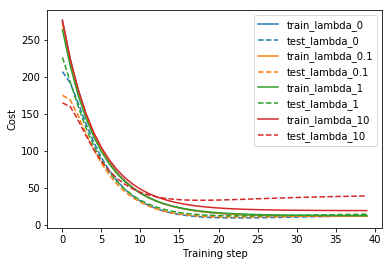

In [5]:
# Step 3: Try gradient descent algorithm with different regularization values
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerTuple

# try different values for the learning rate
alpha = 0.1

# regularization term
lambdas = [0,0.1,1,10]

# this matrix keeps the learned parameters
theta_matrix = np.zeros((len(lambdas),x_train_scaled.shape[1]))

# number of training iterations
N_iterations = 40

# prepare to plot
fig = plt.subplot(111)
ax = plt.gca()

# calculate cost value and update theta
lines = []
for indx,lambda_ in enumerate(lambdas):
    # keep the cost value for each training step
    J_train = np.zeros(N_iterations)
    J_test = np.zeros(N_iterations)
    
    # initialize new parameters using random distribution
    theta = 0.5 * np.random.randn(x_train_scaled.shape[1])
    for step in range(N_iterations):
        # update theta
        theta = theta - alpha * compute_regularized_gradient(x_train_scaled,y_train,theta,lambda_)
        
        # calculate the cost on traing set
        J_train[step] = compute_regularized_cost(x_train_scaled,y_train,theta,lambda_)
        # calculate cost on the testing set
        J_test[step] = compute_regularized_cost(x_test_scaled,y_test,theta,lambda_)
    # save the value of theta
    theta_matrix[indx,:] = theta

    # use this color for both training and testing cost
    color = next(ax._get_lines.prop_cycler)['color']
    # plot cost function
    line1 = plt.plot(J_train,color=color)
    line2 = plt.plot(J_test,'--',color=color)
    lines.append((line1,line2))
plt.xlabel('Training step')
plt.ylabel('Cost')
labels = []
for lbd in lambdas:
    labels.append('train_lambda_' + str(lbd))
    labels.append('test_lambda_' + str(lbd))
plt.legend(labels, loc = 'best')
plt.show()

('test cost: ', 12.320106518294978)


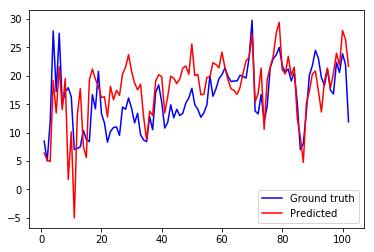

In [6]:
# Step 4: choose lambda
lambda_index = 0
theta = theta_matrix[lambda_index,:]
predict_price = np.dot(x_test_scaled,theta)

# calculate the cost for the test set with lambda=0
test_cost = compute_regularized_cost(x_test_scaled,y_test,theta,0)
print('test cost: ',test_cost)

# plot the ground truth and the predicted
x_axis = np.linspace(1,len(y_test),len(y_test))
plt.plot(x_axis,y_test,'b',x_axis,predict_price,'r')
plt.legend(('Ground truth','Predicted'))
plt.show()